In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager
import re

In [513]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [514]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [515]:
rdf_sp = df_sp.copy()

In [516]:
CH4 = (df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'])/const.N_A*16
C2H6 = (df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'])/const.N_A*30
C2H4 = (df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])/const.N_A*28
C2H2 = (df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'])/const.N_A*26
C3H8 = (df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])/const.N_A*44
C3H6 = (df_sp['C3H6'] + df_sp['C3H6(V)'])/const.N_A*42
C2H = df_sp['C2H']/const.N_A*25
CH = df_sp['CH']/const.N_A*13
C3H7 = df_sp['C3H7']/const.N_A*43
C3H5 = df_sp['C3H5']/const.N_A*41
CH3 = df_sp['CH3']/const.N_A*15
CH2 = df_sp['CH2']/const.N_A*14
C2H3 = df_sp['C2H3']/const.N_A*27
C4H9 = df_sp['C4H9']/const.N_A*57
C2H5 = df_sp['C2H5']/const.N_A*29
C3H4 = df_sp['C3H4']/const.N_A*40
C5H12 = df_sp['C5H12']/const.N_A*72
C4H10 = df_sp['C4H9H']/const.N_A*58

del_CH4 = CH4.iloc[0] - CH4.iloc[-1]
CH4_conv_cal = del_CH4/CH4.iloc[0] * 100
total_CH = C2H6 + C2H4 + C2H2 + C3H8 + C3H6 + C2H + CH + C3H7 + C3H5 + CH3 + CH2 + C2H3 + C4H9 + C2H5 + C3H4 + C5H12 + C4H10
C2H6_sel_cal = C2H6/total_CH * 100
C2H4_sel_cal = C2H4/total_CH * 100
C2H2_sel_cal = C2H2/total_CH * 100
C3H8_sel_cal = C3H8/total_CH * 100
C3H6_sel_cal = C3H6/total_CH * 100
C2H_sel_cal = C2H/total_CH * 100
CH_sel_cal = CH/total_CH * 100
C3H7_sel_cal = C3H7/total_CH * 100
C3H5_sel_cal = C3H5/total_CH * 100
CH3_sel_cal = CH3/total_CH * 100
CH2_sel_cal = CH2/total_CH * 100
C2H3_sel_cal = C2H3/total_CH * 100
C4H9_sel_cal = C4H9/total_CH * 100
C2H5_sel_cal = C2H5/total_CH * 100
C3H4_sel_cal = C3H4/total_CH * 100
C5H12_sel_cal = C5H12/total_CH * 100
C4H10_sel_cal = C4H10/total_CH * 100

In [517]:
len(df_sp['Time [s]'])

3016

4.930691056910564


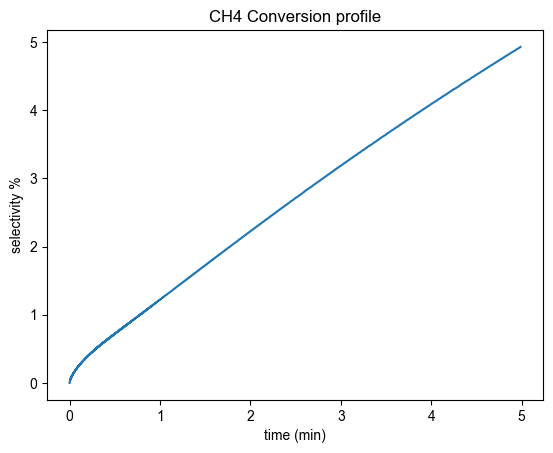

In [518]:
plt.plot(df_sp['Time [s]'], (CH4.iloc[0] - CH4)/CH4.iloc[0]*100)
plt.title('CH4 Conversion profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
print((CH4.iloc[0] - CH4.iloc[-1])/CH4.iloc[0]*100)

In [519]:

print(3/2*df_cd['Electron temperature [K]'].iloc[-1] / const.e * const.k)
print(df_cd['Current density [A/cm2]'].iloc[-1])

8.689374168216712
2.2073e-05


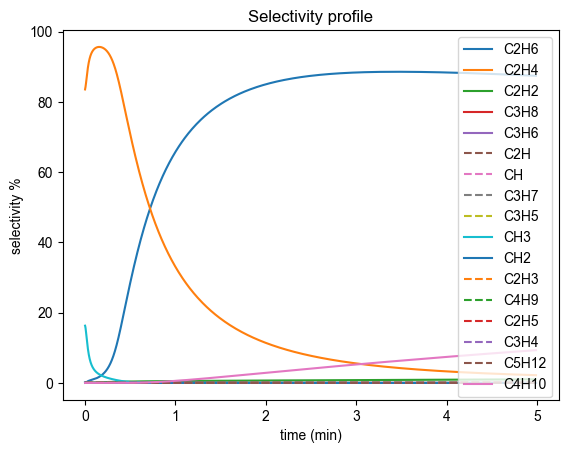

In [520]:
a = 200
plt.plot(df_sp['Time [s]'], C2H6_sel_cal, label='C2H6')
plt.plot(df_sp['Time [s]'], C2H4_sel_cal, label='C2H4')
plt.plot(df_sp['Time [s]'], C2H2_sel_cal, label='C2H2')
plt.plot(df_sp['Time [s]'], C3H8_sel_cal, label='C3H8')
plt.plot(df_sp['Time [s]'], C3H6_sel_cal, label='C3H6')
plt.plot(df_sp['Time [s]'], C2H_sel_cal, label='C2H',linestyle='--')
plt.plot(df_sp['Time [s]'], CH_sel_cal, label='CH',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H7_sel_cal, label='C3H7',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H5_sel_cal, label='C3H5',linestyle='--')
plt.plot(df_sp['Time [s]'], CH3_sel_cal, label='CH3')
plt.plot(df_sp['Time [s]'], CH2_sel_cal, label='CH2')
plt.plot(df_sp['Time [s]'], C2H3_sel_cal, label='C2H3',linestyle='--')
plt.plot(df_sp['Time [s]'], C4H9_sel_cal, label='C4H9',linestyle='--')
plt.plot(df_sp['Time [s]'], C2H5_sel_cal, label='C2H5',linestyle='--')
plt.plot(df_sp['Time [s]'], C3H4_sel_cal, label='C3H4',linestyle='--')
plt.plot(df_sp['Time [s]'], C5H12_sel_cal, label='C5H12',linestyle='--')
plt.plot(df_sp['Time [s]'], C4H10_sel_cal, label='C4H10')
plt.title('Selectivity profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
plt.legend()
plt.show()

In [521]:
a = df_rx.columns[(df_rx > 1e14).any()].tolist()
b = [col for col in a if not re.search(r'bolsig|e|\^+', col)]
c = [col for col in b if re.search(r'C4H9H', col)]
print(C2H6_sel_cal.iloc[-1])
print(C2H4_sel_cal.iloc[-1])
print(C2H2_sel_cal.iloc[-1])
print(C3H6_sel_cal.iloc[-1])
print(C3H8_sel_cal.iloc[-1])

87.41326263118614
2.2010775808695815
1.0249185943194545
0.0003453343275175873
0.009018964747466541


In [522]:
c

['7 C2H5+C2H5=>C4H9H', '8 C2H5+C4H9=>C2H4+C4H9H', '3 C4H9H+H=>C4H9+H2']